In [1]:
import csv
import math
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.stats as stats
import scipy.io as sio
from scipy import sparse
import sklearn.neighbors as nbrs
from sklearn.utils.graph_shortest_path import graph_shortest_path
import matplotlib.pyplot as plt
import networkx as nx
import scipy.sparse.linalg as ll

(698, 4096)


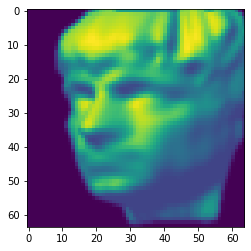

In [2]:
# Part A - Similarity Graph
data = sio.loadmat('isomap.mat')['images'].T
print(data.shape)
m = 698
plt.imshow(data[0].reshape(64,64).T, interpolation='nearest')
plt.show()

In [3]:
a = nbrs.kneighbors_graph(data, mode='connectivity',n_neighbors=100,p=2,metric='minkowski').toarray() #Euclidean: p=2
print(len(a[0][a[0]!=0]))

100


In [4]:
edges = []
for i in range(698):
    for j in range(698):
        if a[i][j] != 0:
            edges.append((str(i)+" "+str(j)))
edges[0:4]

['0 2', '0 11', '0 13', '0 19']

In [5]:
G = nx.parse_edgelist(edges, nodetype = int)
Q = nx.spring_layout(G)
print(G.number_of_edges())
print(G.number_of_nodes())
list(G.edges)[0:5]
#list(G.edges(data=True))[0:5]

43175
698


[(0, 2), (0, 11), (0, 13), (0, 19), (0, 21)]

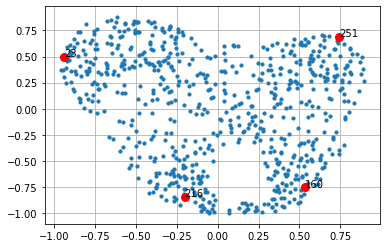

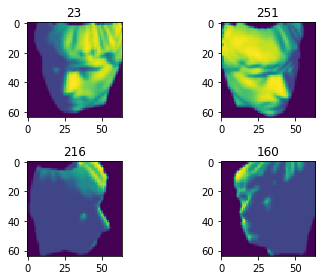

In [6]:
fig, ax = plt.subplots()
ax.axis('auto')
nx.draw_networkx_nodes(G,pos=Q, node_size=10, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.grid()
pts = [23,251,216,160]
for i in pts:
    plt.plot(Q[i][0],Q[i][1],'ro',markersize=8)
    ax.annotate(str(i), (Q[i][0], Q[i][1]))
plt.show()
for j in range(0,4):
    plt.subplot(2,2,j+1)
    plt.imshow(data[pts[j]].reshape(64,64).T, interpolation='nearest')
    plt.gca().set_title(str(pts[j]))
plt.tight_layout()

In [7]:
# Part B - ISOMAP Algorithm
A = nbrs.kneighbors_graph(data, mode='distance',n_neighbors=100,p=2,metric='minkowski').toarray() # mode = distance
D = graph_shortest_path(A)
print(len(D[0][D[0]!=0]))
D[0][0:20]

697


array([ 0.        , 35.72762992,  6.74323967, 36.94389595, 22.46287651,
       39.4248642 , 41.16800555, 33.89891942, 43.34846502, 21.43060022,
       38.14491121, 10.03619136, 27.69868123, 13.65226768, 20.02537435,
       21.66395876, 31.60657621, 23.29707971, 27.97233837,  8.50263115])

In [8]:
D2 = D**2
H = np.identity(m)-(1/m)*np.ones((m,m))
C = -1/(2*m) * H @ D2 @ H
C[0][0:10]

array([ 0.41839797, -0.39357064,  0.35601542, -0.34534197,  0.26629497,
       -0.55834892, -0.44293864, -0.26389967, -0.72700329,  0.06591292])

In [9]:
S,W = ll.eigs(C,k = 100)
S = np.real(S)
W = np.real(W)

sort = sorted(S,reverse=True)
i1 = list(S).index(sort[0])
i2 = list(S).index(sort[1])

Z = np.array([W[:,i1]*math.sqrt(sort[0]),W[:,i2]*math.sqrt(sort[1])]).T

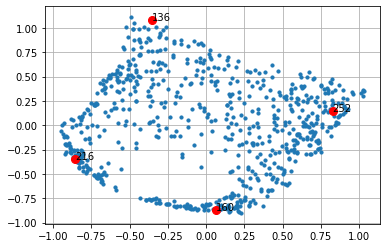

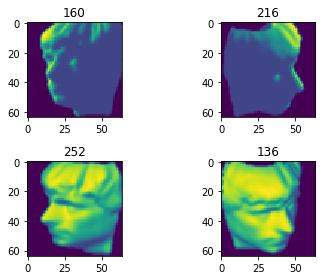

In [10]:
fig, ax = plt.subplots()
ax.axis('auto')
nx.draw_networkx_nodes(G,pos=-Z, node_size=10, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.grid()
pts = [160,216,252,136]
for i in pts:
    plt.plot(-Z[i][0],-Z[i][1],'ro',markersize=8)
    ax.annotate(str(i), (-Z[i][0], -Z[i][1]))
plt.show()
for j in range(0,4):
    plt.subplot(2,2,j+1)
    plt.imshow(data[pts[j]].reshape(64,64).T, interpolation='nearest')
    plt.gca().set_title(str(pts[j]))
plt.tight_layout()

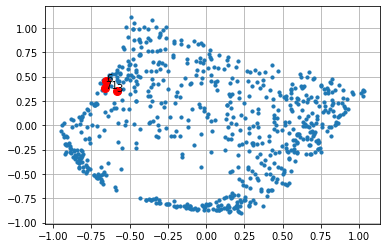

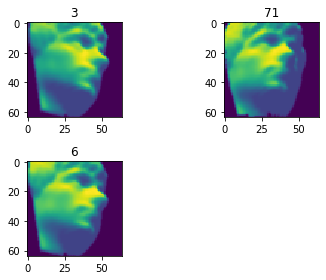

In [11]:
fig, ax = plt.subplots()
ax.axis('auto')
nx.draw_networkx_nodes(G,pos=-Z, node_size=10, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.grid()
pts = [3,71,6]
for i in pts:
    plt.plot(-Z[i][0],-Z[i][1],'ro',markersize=8)
    ax.annotate(str(i), (-Z[i][0], -Z[i][1]))
plt.show()
for j in range(0,3):
    plt.subplot(2,2,j+1)
    plt.imshow(data[pts[j]].reshape(64,64).T, interpolation='nearest')
    plt.gca().set_title(str(pts[j]))
plt.tight_layout()

In [12]:
# Part C - Manhattan Distance
a_m = nbrs.kneighbors_graph(data, mode='connectivity',n_neighbors=100,p=1,metric='minkowski').toarray() #Manhattan: p=1
print(len(a_m[0][a_m[0]!=0]))
m = 698
edges_m = []
for i in range(698):
    for j in range(698):
        if a_m[i][j] != 0:
            edges_m.append((str(i)+" "+str(j)))
edges_m[0:4]

100


['0 2', '0 11', '0 13', '0 19']

In [13]:
G_m = nx.parse_edgelist(edges_m, nodetype = int)
Q_m = nx.spring_layout(G_m)
print(G_m.number_of_edges())
print(G_m.number_of_nodes())

42797
698


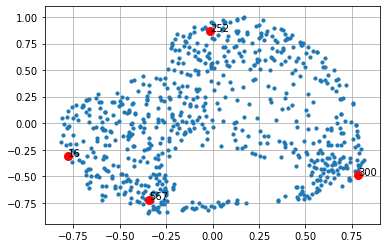

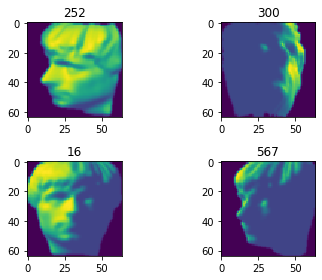

In [14]:
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G_m,pos=Q_m, node_size=10, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.grid()
pts_m = [252,300,16,567]
for i in pts_m:
    plt.plot(Q_m[i][0],Q_m[i][1],'ro',markersize=8)
    ax.annotate(str(i), (Q_m[i][0], Q_m[i][1]))
plt.show()
for j in range(0,4):
    plt.subplot(2,2,j+1)
    plt.imshow(data[pts_m[j]].reshape(64,64).T, interpolation='nearest')
    plt.gca().set_title(str(pts_m[j]))
plt.tight_layout()

In [15]:
A_m = nbrs.kneighbors_graph(data, mode='distance',n_neighbors=100,p=1,metric='minkowski').toarray() # mode = distance
D_m = graph_shortest_path(A_m)
print(len(D_m[0][D_m[0]!=0]))
D_m[0][0:20]

697


array([   0.        , 1585.75027574,  257.36994485, 1605.08204657,
        875.77886029, 1675.96645221, 1790.74859069, 1478.56976103,
       1695.70168505,  911.62579657, 1637.83691789,  416.54748775,
       1273.78030025,  561.58293505,  833.82610294,  877.55428922,
       1237.46390931, 1029.71112132, 1217.3799326 ,  377.32717525])

In [16]:
Dm2 = D_m**2
H = np.identity(m)-(1/m)*np.ones((m,m))
Cm = -1/(2*m) * H @ Dm2 @ H
Cm[0][0:10]

array([  844.81501106,  -898.61995747,   753.7160078 ,  -665.98919385,
         486.4820895 , -1034.68285591,  -878.35058447,  -493.09847003,
       -1083.04859708,   184.17966785])

In [17]:
Sm,Wm = ll.eigs(Cm,k = 100)
Sm = np.real(Sm)
Wm = np.real(Wm)

sort_m = sorted(Sm,reverse=True)
i1_m = list(Sm).index(sort_m[0])
i2_m = list(Sm).index(sort_m[1])

Zm = np.array([Wm[:,i1_m]*math.sqrt(sort_m[0]),Wm[:,i2_m]*math.sqrt(sort_m[1])]).T

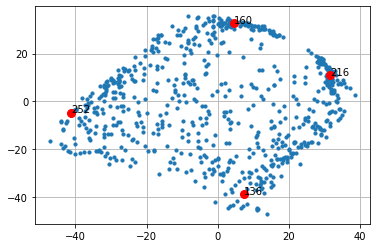

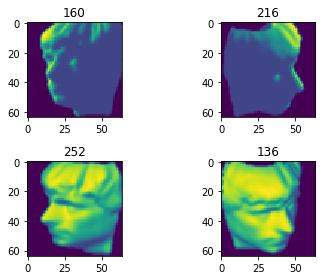

In [18]:
fig, ax = plt.subplots()
ax.axis('auto')
nx.draw_networkx_nodes(G_m,pos=-Zm, node_size=10, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.grid()
pts_m = [160,216,252,136]
for i in pts_m:
    plt.plot(-Zm[i][0],-Zm[i][1],'ro',markersize=8)
    ax.annotate(str(i), (-Zm[i][0], -Zm[i][1]))
plt.show()
for j in range(0,4):
    plt.subplot(2,2,j+1)
    plt.imshow(data[pts_m[j]].reshape(64,64).T, interpolation='nearest')
    plt.gca().set_title(str(pts_m[j]))
plt.tight_layout()